In [1]:
# import the libraries to use
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

# Step 1: Problem statement and data collection

We can see the data information in the page <https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv>

In [2]:
from src.utils import load_data, ReadCsvParams, SaveCsvParams

file_path = '../data/raw/housing.csv'
url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'
read_csv_params: ReadCsvParams = {'delimiter': ','}
save_csv_params: SaveCsvParams = {'sep': ','}

df: pd.DataFrame = load_data(
    file_path=file_path, url=url, read_csv_params=read_csv_params, save_csv_params=save_csv_params
)

Loading data from file: ../data/raw/housing.csv


## Problem to solve:
Create a Kmeans model to classify the data, then create a classification model based on the classes given.

# Step 2: Exploration and data cleaning

### Keep the needed data

In this case, we are only interested in the Latitude, Longitude and MedInc columns.

In [3]:
df = df[['Latitude', 'Longitude', 'MedInc']]

### Dataframe information

Let's see how is the data, the info and a little of its distribution.

In [4]:
# head of the dataframe
df.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [5]:
# tail of the dataframe
df.tail()

,Latitude,Longitude,MedInc
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672
20639,39.37,-121.24,2.3886


In [6]:
# info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20640 non-null  float64
 1   Longitude  20640 non-null  float64
 2   MedInc     20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [7]:
# describe the dataframe
df.describe()

,Latitude,Longitude,MedInc
count,20640.000000,20640.000000,20640.000000
mean,35.631861,-119.569704,3.870671
std,2.135952,2.003532,1.899822
min,32.540000,-124.350000,0.499900
25%,33.930000,-121.800000,2.563400
50%,34.260000,-118.490000,3.534800
75%,37.710000,-118.010000,4.743250
max,41.950000,-114.310000,15.000100


### Create the class column with a kmeans model

In [8]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


# Training the model
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(df)

KMeans(n_clusters=6, random_state=42)

In [9]:
# now make the predictions under the same data to get the classes
df['class'] = model.predict(df)

In [10]:
# show the new classes
df.head()

,Latitude,Longitude,MedInc,class
0,37.88,-122.23,8.3252,2
1,37.86,-122.22,8.3014,2
2,37.85,-122.24,7.2574,2
3,37.85,-122.25,5.6431,2
4,37.85,-122.25,3.8462,1


#### Now lets see how the groups were created

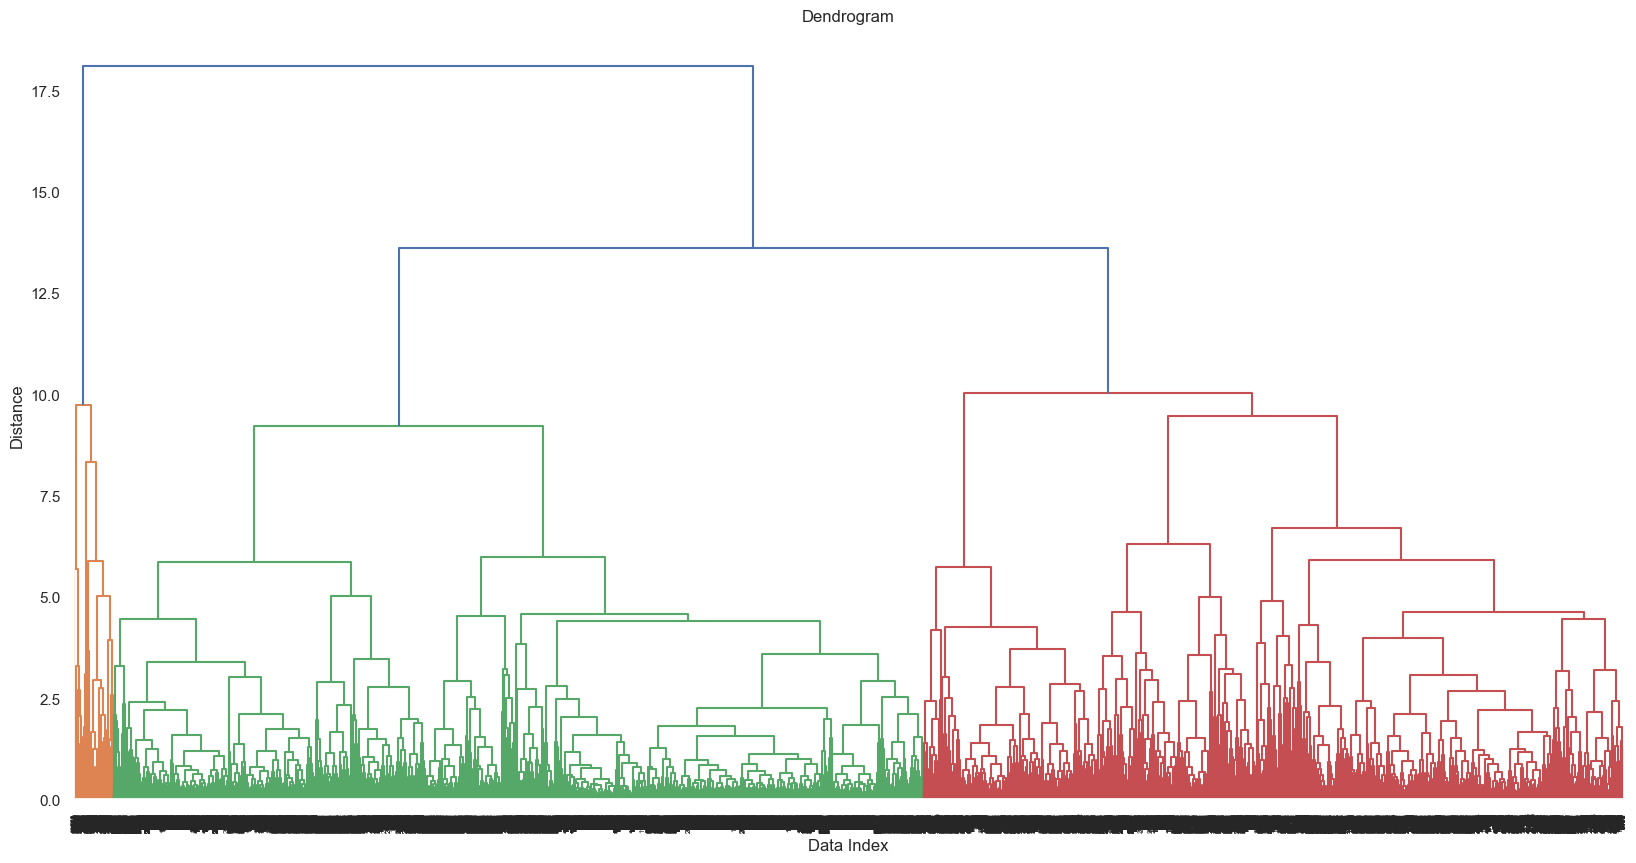

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage


# Calculate the similarity matrix between clusters
Z = linkage(df, method = "complete")

# Display the dendrogram
plt.figure(figsize = (20, 10))

dendrogram(Z)

plt.title("Dendrogram")
plt.xlabel("Data Index")
plt.ylabel("Distance")
plt.show()

In the dendrogram we can see just 4 of the clusters that we specified in the model. We will need another graph to see all the groups.

#### Save the model

In [12]:
from pickle import dump

with open("../models/kmeans.sav", "wb") as file:
    dump(model, file)

## Cols for the different types of data

In [13]:
# numerical columns
numerical_cols: list[str] = ['Latitude', 'Longitude', 'MedInc']

# categorical columns
categorical_cols: list[str] = ['class']

# features
features = ['Latitude', 'Longitude', 'MedInc']

# target variable
target: str = 'class'

## Eliminate duplicates

We do not have a value to know if there are duplicates.

# Step 3: Analysis of uni variate variables

A **uni variate variable** is a statistical term used to refer to a set of observations of an attribute. That is, the column-by-column analysis of the DataFrame. To do this, we must distinguish whether a variable is categorical or numerical, as the body of the analysis and the conclusions that can be drawn will be different.

## Analysis of categorical variables

A **categorical variable** is a type of variable that can be one of a limited number of categories or groups. These groups are often nominal (e.g., the color of a car: red, blue, black, etc., but none of these colors is inherently "greater" or "better" than the others) but can also be represented by finite numbers.

**To represent these types of variables we will use histograms.**

In [14]:
# let's remember the categorical data
print(f'Categorical columns: {categorical_cols}')
print(f'Amount of categorical columns: {len(categorical_cols)}')

Categorical columns: ['class']
Amount of categorical columns: 1


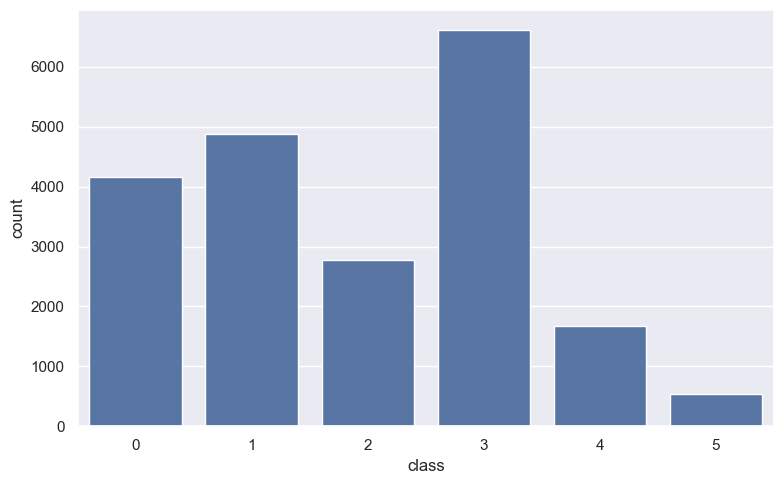

In [15]:
fig, axis = plt.subplots(figsize=(8, 5))

"""
Create histograms for each categorical feature to see the count for each categorical feature.
"""

# creating a multiple figure with histograms and box plots
# first row
# 	 col
sns.countplot(data=df, x="class")

# adjust the layout
plt.tight_layout()

# show the plot
plt.show()

### Analysis

We can see that the class with the leas ammount of values is the number 5 and 4. The other ones seems well distributed.

## Analysis on numeric variables

A **numeric variable** is a type of variable that can take numeric values (integers, fractions, decimals, negatives, etc.) in an infinite range. A numerical categorical variable can also be a numerical variable. 

**They are usually represented using a histogram and a boxplot, displayed together.**

In [16]:
# let's remember the categorical data
print(f'Categorical columns: {numerical_cols}')
print(f'Amount of categorical columns: {len(numerical_cols)}')

Categorical columns: ['Latitude', 'Longitude', 'MedInc']
Amount of categorical columns: 3


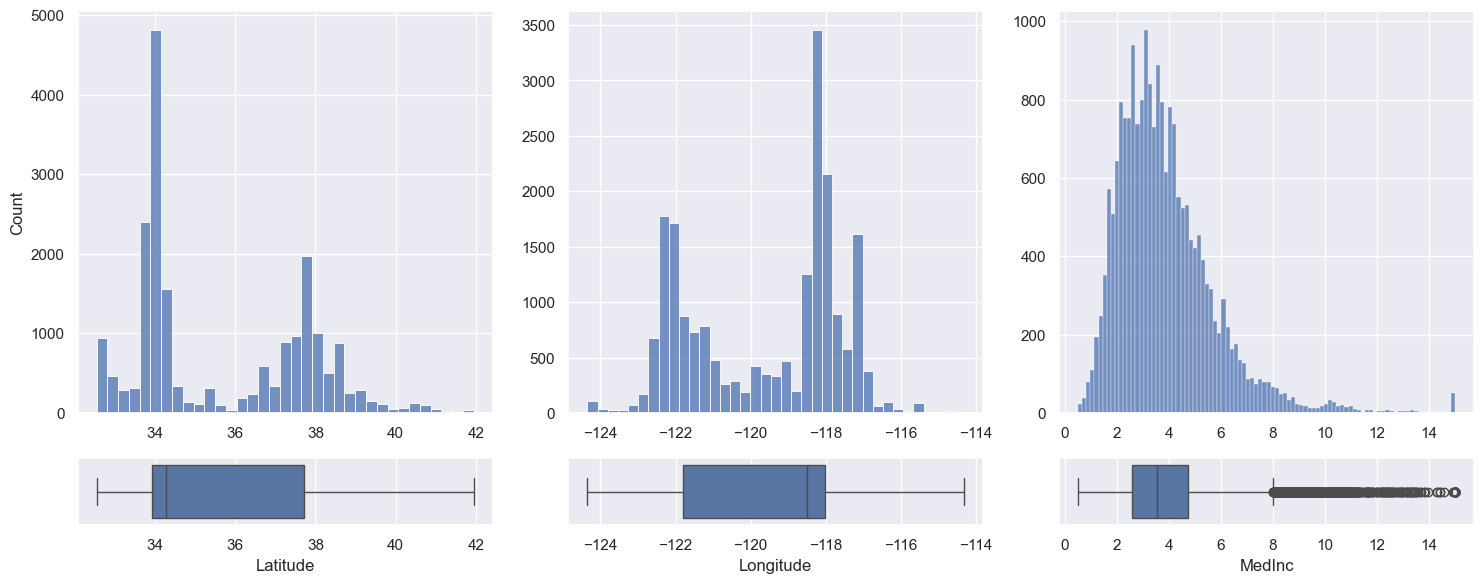

In [17]:
_, axis = plt.subplots(2, 3, figsize=(15, 6), gridspec_kw={'height_ratios': [6, 1]})

"""
Create histograms and box-plots for each numerical feature to see the count for each categorical feature.
"""

# creating a multiple figure with histograms and box plots
# first row
# 	 col
sns.histplot(ax=axis[0, 0], data=df, x="Latitude").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="Latitude")
# 	second col
sns.histplot(ax=axis[0, 1], data=df, x="Longitude").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="Longitude")
# 	third col
sns.histplot(ax=axis[0, 2], data=df, x="MedInc").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 2], data=df, x="MedInc")

# adjust the layout
plt.tight_layout()

# show the plot
plt.show()

### Analysis

Do the breakdown of the distribution and skewness for each variable:

**1. Latitude**

* **Histogram:** The latitude distribution shows a bimodal pattern with two distinct peaks, one around 34 and the other around 38. This suggests that the data might be clustered in two geographically distinct locations.
* **Box Plot:** The box plot appears relatively symmetrical, supporting the bimodal interpretation. There are no apparent outliers.
* **Distribution:** Not normally distributed. It's bimodal, indicating two distinct clusters.
* **Skewness:** Relatively symmetrical, but the bimodal nature negates a simple skew assessment.

**2. Longitude**

* **Histogram:** Similar to latitude, the longitude distribution also shows a bimodal pattern with two distinct peaks, one around -122 and the other around -118. This suggests that the data might be clustered in two geographically distinct locations. This reinforces the idea of two distinct locations.
* **Box Plot:** The box plot is also relatively symmetrical, again supporting the bimodal interpretation. There are no apparent outliers.
* **Distribution:** Not normally distributed. It's bimodal, suggesting two distinct clusters.
* **Skewness:** Relatively symmetrical, but the bimodal nature makes a skew assessment less relevant.

**3. MedInc**

* **Histogram:** The distribution is heavily right-skewed. Most of the data is concentrated at the lower end, with a long tail extending towards higher income values. It has a little peak at values higher than 14.
* **Box Plot:** The box plot confirms the strong right skew and shows several outliers at higher income values.
* **Distribution:** Not normally distributed. It's a highly right-skewed distribution.
* **Skewness:** Strongly right-skewed (positive skew).


# Step 4: Analysis of multivariate variables

After analyzing the characteristics one by one, it is time to analyze them in relation to the predictor and to themselves, in order to draw clearer conclusions about their relationships and to be able to make decisions about their processing.

Thus, if we would like to eliminate a variable due to a high amount of null values or certain outliers, it is necessary to first apply this process to ensure that the elimination of certain values are not critical for the survival of a passenger. For example, the variable Cabin has many null values, and we would have to ensure that there is no relationship between it and survival before eliminating it, since it could be very significant and important for the model and its presence could bias the prediction.

## Numerical-numerical analysis

When the two variables being compared have numerical data, the analysis is said to be numerical-numerical. 

**Scatter-plots and correlation analysis are used to compare two numerical columns.**

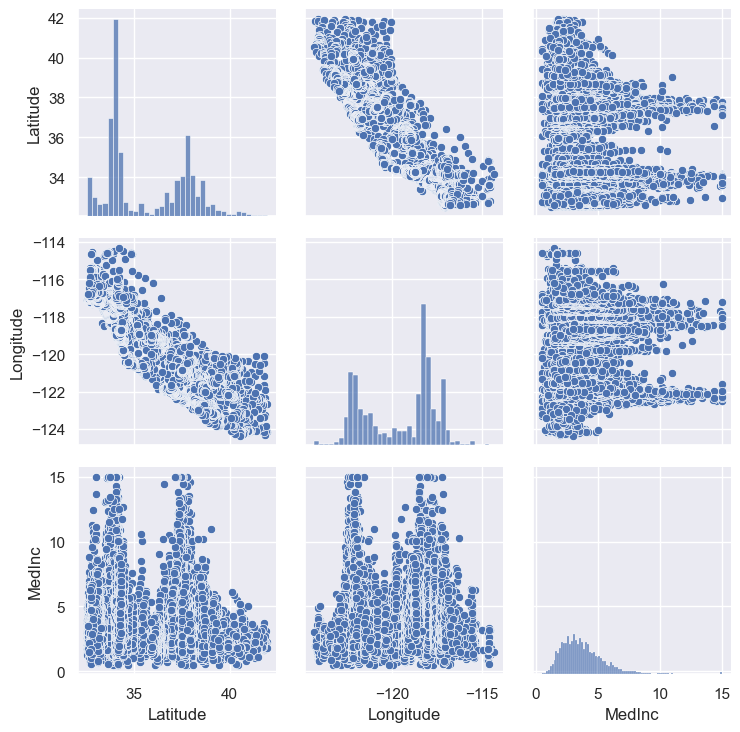

In [18]:
# graphs of numerical vs numerical with histograms and scatter plots
g = sns.PairGrid(df[numerical_cols])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

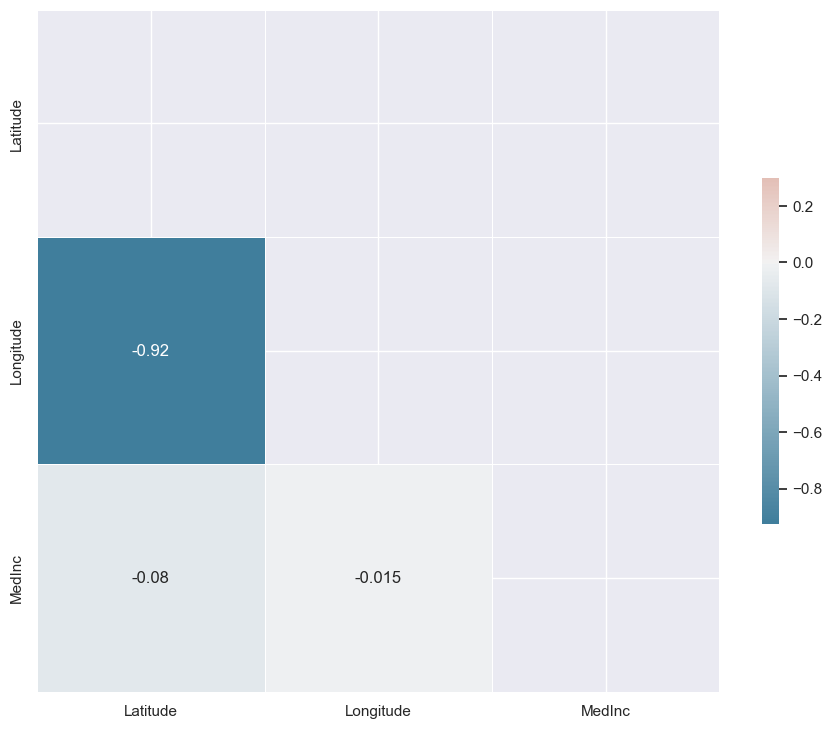

In [19]:
from src.draw_utils import draw_corr_matrix

# compute the correlation matrix of the numerical columns
corr = df[numerical_cols].corr()

# draw the correlation matrix
draw_corr_matrix(corr=corr)

### Analysis

We can see a high negative correlation between Longitude and Latitude.

## Categorical-categorical analysis

We just have one categorical value this analysis is not necessary.

### Combinations of class with various predictors

In [20]:
# let's remember the numerical data
print(f'Numerical columns: {numerical_cols}')
print(f'Amount of numerical columns: {len(numerical_cols)}')

Numerical columns: ['Latitude', 'Longitude', 'MedInc']
Amount of numerical columns: 3


In [21]:
# let's remember the categorical data
print(f'Categorical columns: {categorical_cols}')
print(f'Amount of categorical columns: {len(categorical_cols)}')

Categorical columns: ['class']
Amount of categorical columns: 1


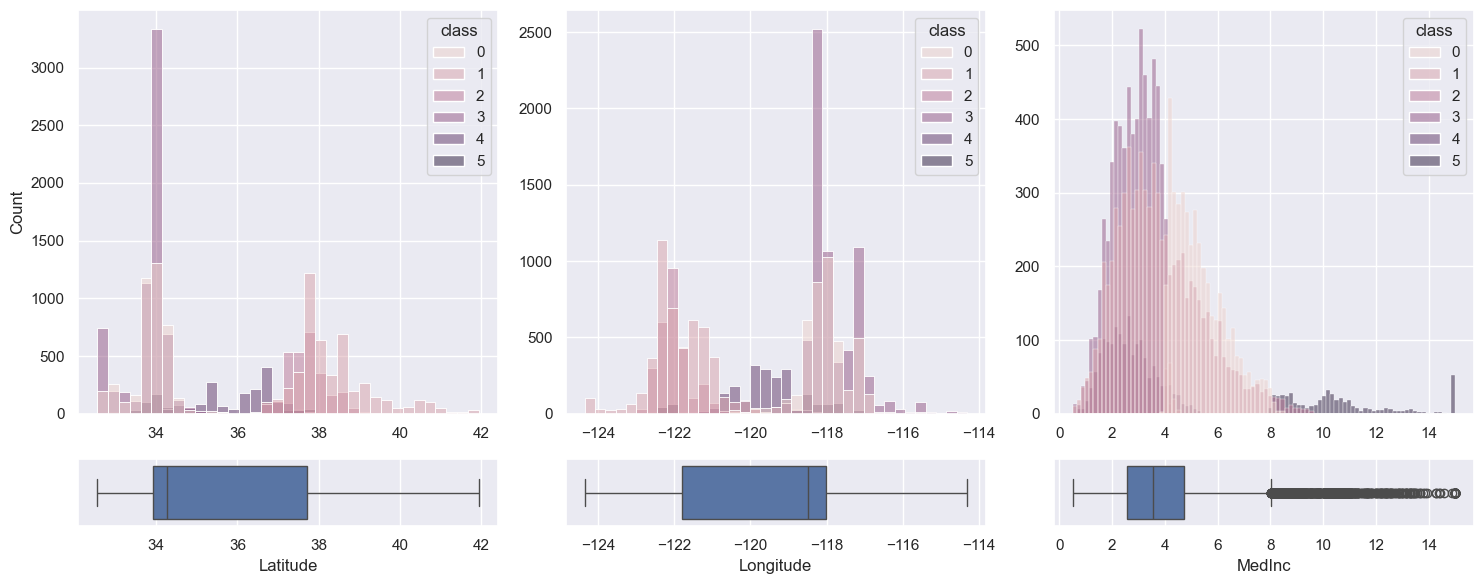

In [22]:
_, axis = plt.subplots(2, 3, figsize=(15, 6), gridspec_kw={'height_ratios': [6, 1]})

"""
Create histograms for each numerical feature with categorical columns as hues.
"""

# creating a multiple figure with histograms and box plots
# first row
# 	 col
sns.histplot(ax=axis[0, 0], data=df, x="Latitude", hue=target).set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="Latitude")
# 	second col
sns.histplot(ax=axis[0, 1], data=df, x="Longitude", hue=target).set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="Longitude")
# 	third col
sns.histplot(ax=axis[0, 2], data=df, x="MedInc", hue=target).set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 2], data=df, x="MedInc")

# adjust the layout
plt.tight_layout()

# show the plot
plt.show()

## Numerical-categorical analysis (complete)

Now do the analysis of the numerical vs categorical variables (factorized).

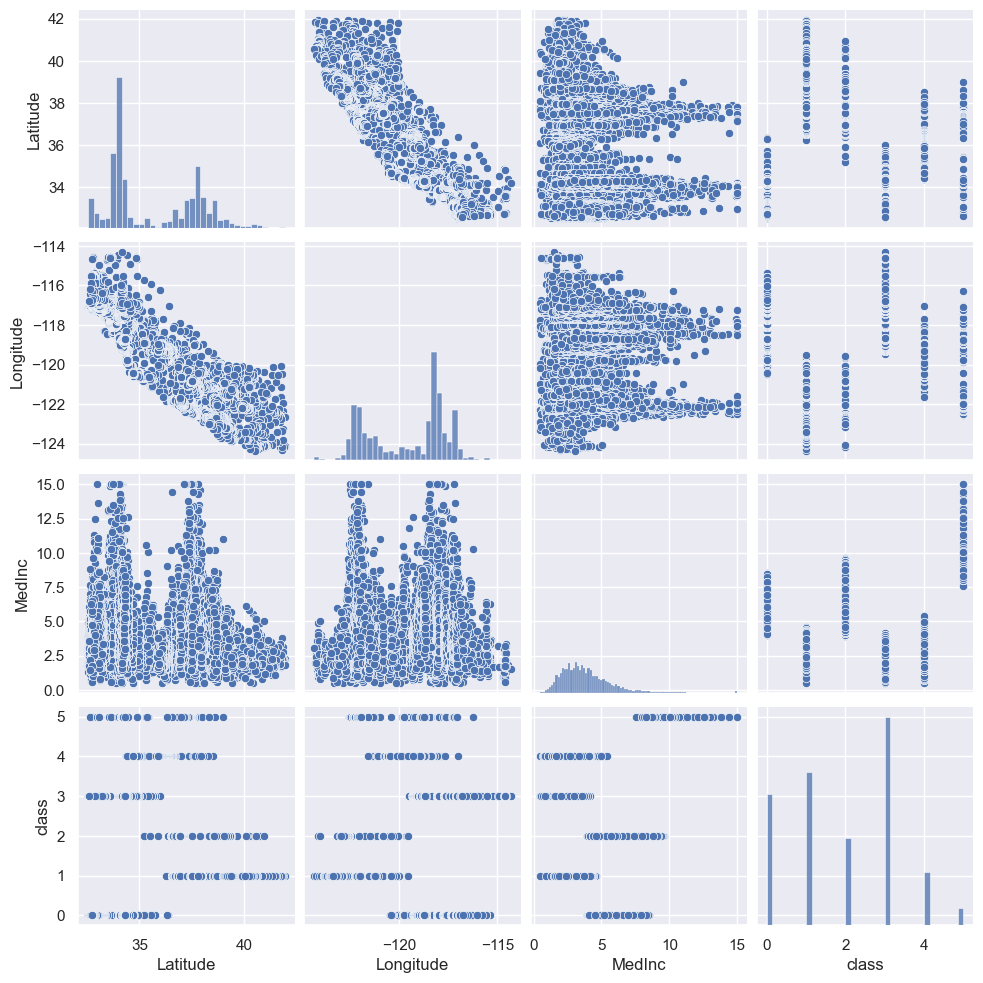

In [23]:
# pair-plot of all the data
sns.pairplot(data=df)

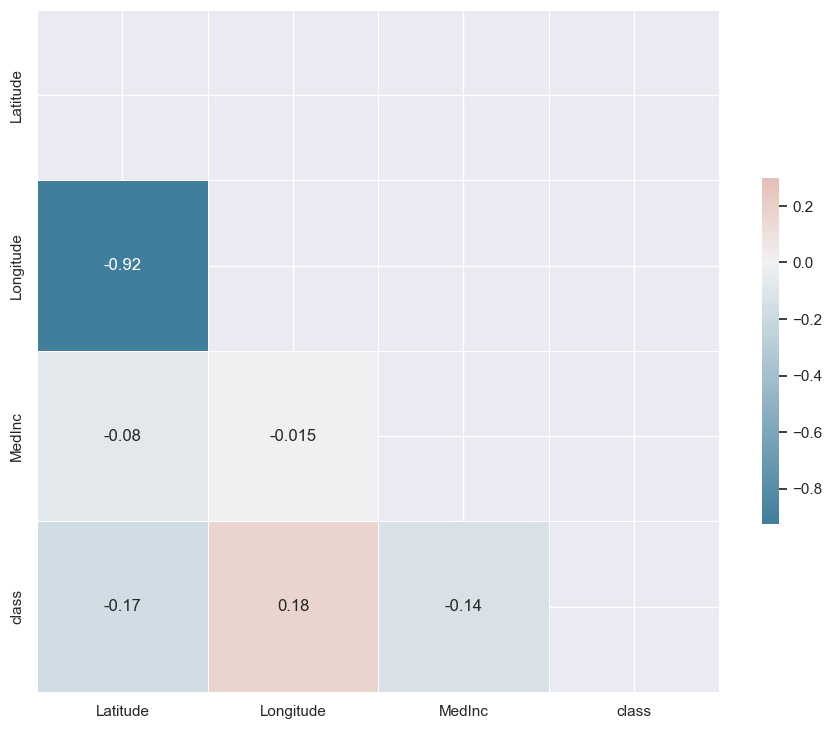

In [24]:
# compute the correlation matrix of all the data
corr = df.corr()

# draw the correlation matrix
draw_corr_matrix(corr=corr)

### Conclusion

We can see that there are not high or strong correlation between the features and the target.

# Step 5: Feature engineering

We did this step on the first part, creating a column with the kmeans model.

## Missing value analysis

A **missing** value is a space that has no value assigned to it in the observation of a specific variable. These types of values are quite common and can arise for many reasons. For example, there could be an error in data collection, someone may have refused to answer a question in a survey, or it could simply be that certain information is not available or not applicable.

In [25]:
# verify non values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20640 non-null  float64
 1   Longitude  20640 non-null  float64
 2   MedInc     20640 non-null  float64
 3   class      20640 non-null  int32  
dtypes: float64(3), int32(1)
memory usage: 564.5 KB


No missing values.

## Outlier analysis

An outlier is a data point that deviates significantly from the others. It is a value that is noticeably different from what would be expected given the general trend of the data. These outliers may be caused by errors in data collection, natural variations in the data, or they may be indicative of something significant, such as an anomaly or extraordinary event.

Descriptive analysis is a powerful tool for characterizing the data set: the mean, variance and quartiles provide powerful information about each variable. The describe() function of a DataFrame helps us to calculate in a very short time all these values.

In [26]:
# verify the distribution again, we are not going to work in the outliers this time
df.describe()

,Latitude,Longitude,MedInc,class
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,35.631861,-119.569704,3.870671,1.921512
std,2.135952,2.003532,1.899822,1.384101
min,32.540000,-124.350000,0.499900,0.000000
25%,33.930000,-121.800000,2.563400,1.000000
50%,34.260000,-118.490000,3.534800,2.000000
75%,37.710000,-118.010000,4.743250,3.000000
max,41.950000,-114.310000,15.000100,5.000000


We are not going to treat the outliers because we are using a Xgboost model.

## Inference of new features

Another typical use of this engineering is to obtain new features by "merging" two or more existing ones.

We did this step on the first part, creating a column with the kmeans model.

## Divide the set into train and test,

In [27]:
from src.utils import split_my_data

# set independent and dependent variables
X: pd.DataFrame = df.drop(target, axis=1)
y: pd.Series = df[target]

# divide the dataset into training and test samples
X_train, X_test, y_train, y_test = split_my_data(X, y, test_size=0.2, random_state=42)

## Feature scaling

**Feature scaling** is a crucial step in data preprocessing for many Machine Learning algorithms. It is a technique that changes the range of data values so that they can be compared to each other.

In this case we are not going to scale the data because the model does not need it.

# Step 6: Save the data

In [28]:
from src.constants import X_TRAIN_PATH, X_TEST_PATH, Y_TRAIN_PATH, Y_TEST_PATH

# save the processed data to their corresponding files
X_train.to_csv(path_or_buf=X_TRAIN_PATH, sep=',', index=False, )
X_test.to_csv(path_or_buf=X_TEST_PATH, sep=',', index=False, )

y_train.to_csv(path_or_buf=Y_TRAIN_PATH, sep=',', index=False, )
y_test.to_csv(path_or_buf=Y_TEST_PATH, sep=',', index=False, )